Logistic Regression

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0.5, 3], [1,1], [1, 2], [3, 0.5], [4, 6], [1, 4.6]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

c:\Users\luigi\python\ML_Course_2025\3_LogisticRegression\functions\utils.py:1207: SyntaxWarning: invalid escape sequence '\l'
  ax.set_zlabel("$\log(E(y,w))$")


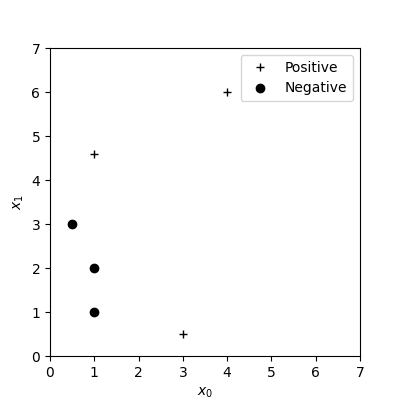

In [3]:
from functions.utils import plot_data
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 7, 0, 7])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## Logistic regression model
* Supponiamo di voler addestrare un modello di regressione logistica su questi dati che ha la forma   
  $f(x) = g(w_1x_1+w_2x_2 + w_0)$
  
  dove $g(z) = \frac{1}{1+e^{-z}}$, che è la funzione sigmoid
* Per semplicità diciamo che abbiamo addestrato il modello e ottieniamo i parametri come $w_0 = -4, w_1 = 1, w_2 = 2$. Cioè,
  $f(x) = g(2x_2+x_1-4)$
 
Cerchiamo di capire cosa sta prevedendo questo modello addestrato, tracciando la sua decision boundary

* Ricordiamo che per la regressione logistica, il modello è rappresentato come 

  $$f_{\mathbf{w}}(\mathbf{x}_{n}) = g(\mathbf{w} \cdot \mathbf{x}_{n} + w_0) \tag{1}$$

  dove $g(z)$ è nota come funzione sigmoid e mappa tutti i valori di input in valori compresi tra 0 e 1:

  $$g(z) = \frac{1}{1+e^{-z}}\tag{2}$$
  
  e $\mathbf{w} \cdot \mathbf{x}$ è il prodotto scalare dei vettori:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_1 x_1 + w_2 x_2$$
  
  
* Interpretiamo l'output del modello ($f_{\mathbf{w}}(x)$) come la probabilità che $y=1$ dato $\mathbf{x}$ e parametrizzato da $\mathbf{w}$.

* Pertanto, per ottenere una previsione finale ($y=0$ o $y=1$) dal modello di regressione logistica, possiamo utilizzare la seguente formula:

  se $f_{\mathbf{w}}(x) >= 0.5$, prevedo $y=1$
  
  se $f_{\mathbf{w}}(x) < 0.5$, prevedo $y=0$
  
  
* Tracciamo la funzione sigmoid per vedere dove $g(z) >= 0.5$

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

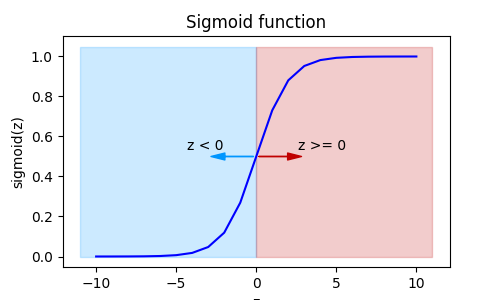

In [5]:
from functions.utils import draw_threshold
z = np.arange(-10,11)
fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_threshold(ax,0)

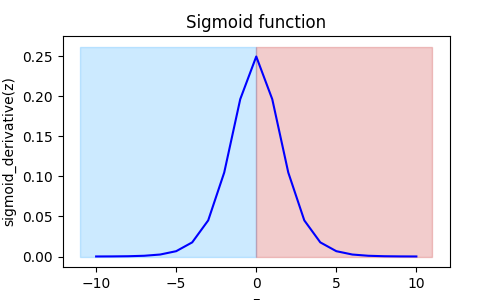

In [6]:
def sigmoid_derivative(z):
    """Derivative of the logistic function."""
    return sigmoid(z) * (1 - sigmoid(z))

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z, sigmoid_derivative(z), c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid_derivative(z)')
ax.set_xlabel('z')
draw_threshold(ax,0)

* Si nota che $g(z) >= 0.5$ per $z >= 0$
* Per un modello di regressione logistica, $z = \mathbf{w} \cdot \mathbf{x} + w_0$. Pertanto,
  se $\mathbf{w} \cdot \mathbf{x} + w_0 >= 0$, il modello prevede $y=1$
  
  se $\mathbf{w} \cdot \mathbf{x} + w_0 < 0$, il modello prevede $y=0$
  
  
  
### Tracciamento della decision boundary
Ora, torniamo al nostro esempio per capire come il modello di regressione logistica sta facendo previsioni.
* Il nostro modello di regressione logistica ha la forma
  $f(\mathbf{x}) = g(2x_2+x_1-4)$
* Dalla teoria possiamo dire che il modello prevede $y=1$ se $2x_2+x_1-4 >= 0$

Vediamo come appare questo graficamente. Inizieremo tracciando $2x_2+x_1-4=0$, che equivale a $x2 = 2 - x_1/2$.

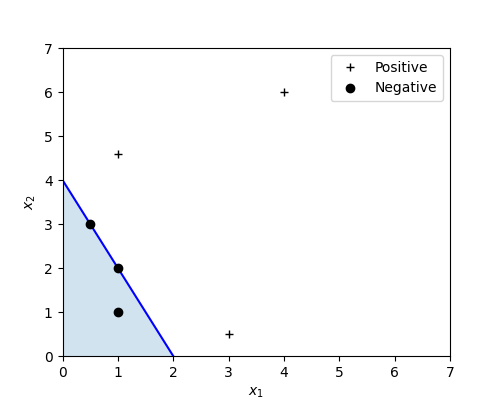

In [7]:
x1 = np.arange(0,6)
x2 = 2 - 0.5*x1
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x2,x1, c="b")
ax.axis([0, 7, 0, 7])

# Fill the region below the line
ax.fill_between(x2,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_2$')
ax.set_xlabel(r'$x_1$')
plt.show()

Nella regressione abbiamo utilizzato la **funzione di costo dell'errore quadratico**:
L'equazione per il costo dell'errore quadratico con una variabile è:
  $$E(y,w) = \frac{1}{2N} \sum\limits_{n = 0}^{N-1} (y(x_n,w) - t_n)^2 \tag{1}$$ 
 
dove 
  $$y(x_n,w) = w_1x_n + w_0 \tag{2}$$

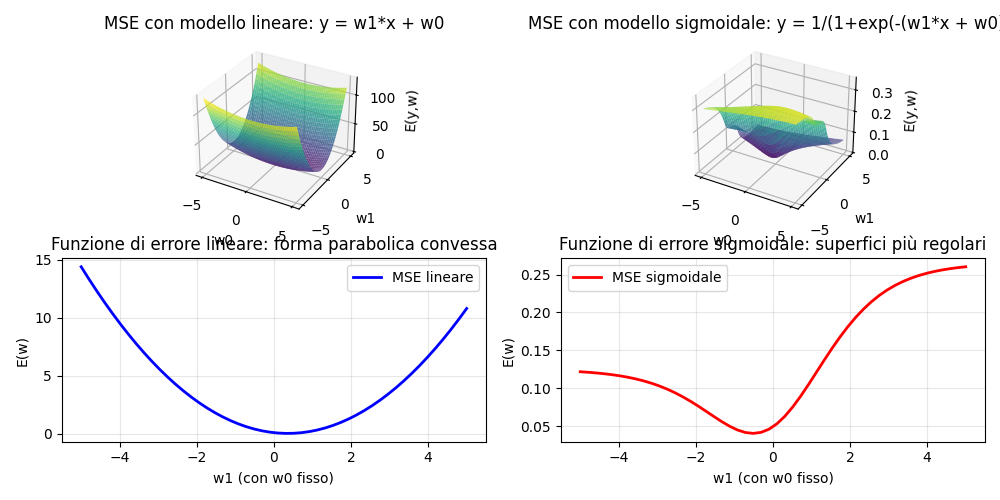

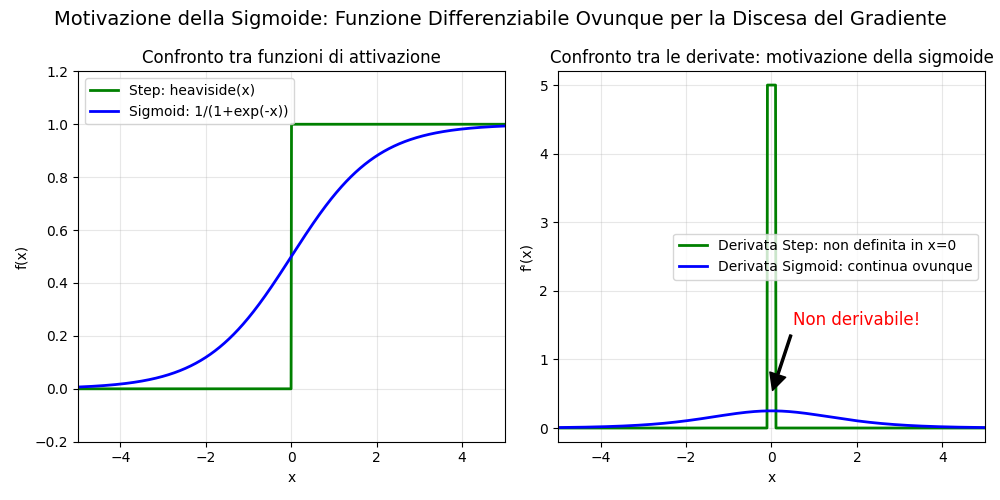

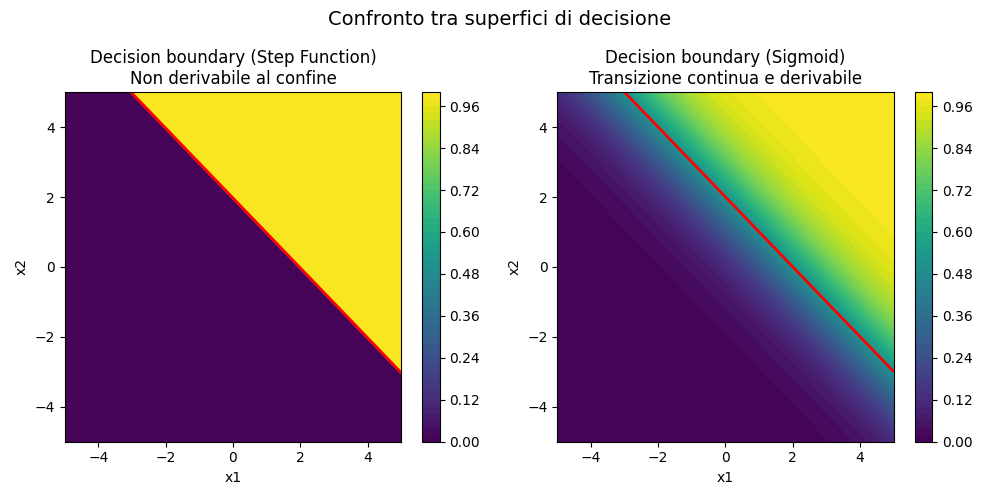

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_error_functions(x_data, t_data, w0_range=(-10, 10), w1_range=(-10, 10), num_points=100):
    """
    Confronta la funzione di errore tra modello lineare e sigmoidale usando MSE.
    
    Args:
        x_data: array dei valori di input
        t_data: array dei valori target
        w0_range: range per il parametro w0 (default: (-10, 10))
        w1_range: range per il parametro w1 (default: (-10, 10))
        num_points: numero di punti per la griglia (default: 100)
    """
    # Crea griglia di valori per w0 e w1
    w0 = np.linspace(w0_range[0], w0_range[1], num_points)
    w1 = np.linspace(w1_range[0], w1_range[1], num_points)
    W0, W1 = np.meshgrid(w0, w1)
    
    # Calcola l'errore per ogni combinazione di w0, w1
    Z_mse = np.zeros_like(W0)
    Z_sigmoid = np.zeros_like(W0)
    
    m = len(x_data)
    
    for i in range(num_points):
        for j in range(num_points):
            w_0 = W0[i, j]
            w_1 = W1[i, j]
            
            # Modello lineare con MSE: y = w1*x + w0
            y_linear = w_1 * x_data + w_0
            error_linear = (y_linear - t_data) ** 2
            Z_mse[i, j] = 0.5 * np.mean(error_linear)
            
            # Modello sigmoidale: y = 1/(1+exp(-(w1*x + w0)))
            z = w_1 * x_data + w_0
            y_sigmoid = 1 / (1 + np.exp(-z))
            error_sigmoid = (y_sigmoid - t_data) ** 2
            Z_sigmoid[i, j] = 0.5 * np.mean(error_sigmoid)
    
   
    
    # Confronto tra modello lineare e sigmoidale
    fig = plt.figure(figsize=(10, 5))
    
    # Plot errore con modello lineare (MSE)
    ax1 = fig.add_subplot(221, projection='3d')
    surf1 = ax1.plot_surface(W0, W1, Z_mse, cmap=cm.viridis, alpha=0.8)
    ax1.set_xlabel('w0')
    ax1.set_ylabel('w1')
    ax1.set_zlabel('E(y,w)')
    ax1.set_title('MSE con modello lineare: y = w1*x + w0')
    
    # Plot errore con modello sigmoidale
    ax2 = fig.add_subplot(222, projection='3d')
    surf2 = ax2.plot_surface(W0, W1, Z_sigmoid, cmap=cm.viridis, alpha=0.8)
    ax2.set_xlabel('w0')
    ax2.set_ylabel('w1')
    ax2.set_zlabel('E(y,w)')
    ax2.set_title('MSE con modello sigmoidale: y = 1/(1+exp(-(w1*x + w0)))')
    
    # Grafico 2D delle sezioni - fissando w0 e variando w1
    ax3 = fig.add_subplot(223)
    
    # Indice del valore centrale di w0
    middle_w0_idx = num_points // 2
    
    # Sezione della funzione di errore lineare - risulta una parabola
    ax3.plot(w1, Z_mse[middle_w0_idx, :], 'b-', linewidth=2, label='MSE lineare')
    ax3.set_xlabel('w1 (con w0 fisso)')
    ax3.set_ylabel('E(w)')
    ax3.set_title('Funzione di errore lineare: forma parabolica convessa')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Sezione della funzione di errore sigmoidale
    ax4 = fig.add_subplot(224)
    ax4.plot(w1, Z_sigmoid[middle_w0_idx, :], 'r-', linewidth=2, label='MSE sigmoidale')
    ax4.set_xlabel('w1 (con w0 fisso)')
    ax4.set_ylabel('E(w)')
    ax4.set_title('Funzione di errore sigmoidale: superfici più regolari')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    return W0, W1, Z_mse, Z_sigmoid

def plot_non_differentiable_function():
    """
    Mostra un esempio di funzione non derivabile al centro (ReLU) confrontata con la sigmoide.
    Motiva la scelta della sigmoide come funzione di attivazione rispetto a funzioni non 
    derivabili come ReLU o funzione a gradino.
    """
    x = np.linspace(-5, 5, 1000) 
    # Funzione a gradino (step function)
    step = np.heaviside(x, 0.5)
    
    # Funzione sigmoide: 1/(1+exp(-x))
    sigmoid = 1 / (1 + np.exp(-x))
    
    # Derivate delle funzioni
    # La derivata della funzione a gradino non è definita in x=0 (dirac delta)
    # Approssimazione con una funzione molto ripida
    step_derivative = np.zeros_like(x)
    step_derivative[np.abs(x) < 0.1] = 5
    
    # Derivata della sigmoide: sigmoid * (1 - sigmoid)
    sigmoid_derivative = sigmoid * (1 - sigmoid)
    
    # Crea grafico delle funzioni e delle loro derivate
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Funzioni
    ax1.plot(x, step, 'g-', linewidth=2, label='Step: heaviside(x)')
    ax1.plot(x, sigmoid, 'b-', linewidth=2, label='Sigmoid: 1/(1+exp(-x))')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-0.2, 1.2)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.set_title('Confronto tra funzioni di attivazione')
    ax1.legend()
    
    # Derivate
    ax2.plot(x, step_derivative, 'g-', linewidth=2, label='Derivata Step: non definita in x=0')
    ax2.plot(x, sigmoid_derivative, 'b-', linewidth=2, label='Derivata Sigmoid: continua ovunque')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-0.2, 5.2)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlabel('x')
    ax2.set_ylabel('f\'(x)')
    ax2.set_title('Confronto tra le derivate: motivazione della sigmoide')
    ax2.legend()
    
    # Aggiungi annotazioni per evidenziare i punti non derivabili
    ax2.annotate('Non derivabile!', xy=(0, 0.5), xytext=(0.5, 1.5),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                fontsize=12, color='red')
    
    plt.suptitle('Motivazione della Sigmoide: Funzione Differenziabile Ovunque per la Discesa del Gradiente', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Decision surface esempio per classificazione binaria
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Generiamo una semplice griglia 2D
    x1 = np.linspace(-5, 5, 100)
    x2 = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    
    # Decision boundary lineare: w1*x1 + w2*x2 + b = 0
    # Esempio: x1 + x2 - 2 = 0
    Z_linear = X1 + X2 - 2
    
    # Output del modello lineare (step function come decisione)
    Z_step = np.heaviside(Z_linear, 0.5)
    
    # Output del modello sigmoidale
    Z_sigmoid = 1 / (1 + np.exp(-Z_linear))
    
    # Plot decision boundary step function
    contour1 = ax1.contourf(X1, X2, Z_step, levels=50, cmap='viridis')
    ax1.contour(X1, X2, Z_step, levels=[0.5], colors='r', linewidths=2)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_title('Decision boundary (Step Function)\nNon derivabile al confine')
    
    # Plot decision boundary sigmoidale
    contour2 = ax2.contourf(X1, X2, Z_sigmoid, levels=50, cmap='viridis')
    ax2.contour(X1, X2, Z_sigmoid, levels=[0.5], colors='r', linewidths=2)
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Decision boundary (Sigmoid)\nTransizione continua e derivabile')
    
    fig.colorbar(contour1, ax=ax1)
    fig.colorbar(contour2, ax=ax2)
    
    plt.suptitle('Confronto tra superfici di decisione', fontsize=14)
    plt.tight_layout()
    plt.show()

def generate_example():
    """
    Genera dati di esempio e mostra i grafici comparativi.
    """
    # Genera dati di esempio
    np.random.seed(42)
    x = np.linspace(-5, 5, 50)
    
    # Target con relazione non lineare per rendere più interessante il confronto
    t = 1 / (1 + np.exp(-(0.8 * x - 1))) + np.random.normal(0, 0.1, 50)
    
    # Plotta le funzioni di errore
    W0, W1, Z_mse, Z_sigmoid = plot_error_functions(x, t, w0_range=(-5, 5), w1_range=(-5, 5), num_points=50)
    
    # Mostra confronto tra funzioni non derivabili e la sigmoide
    plot_non_differentiable_function()
    
    return x, t, W0, W1, Z_mse, Z_sigmoid

x, t, W0, W1, Z_mse, Z_sigmoid = generate_example()

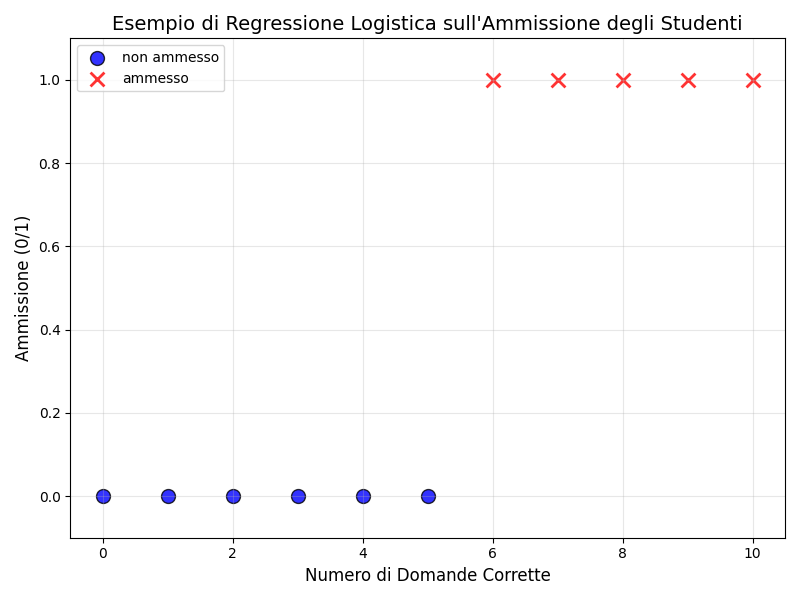

<module 'matplotlib.pyplot' from 'c:\\Users\\luigi\\python\\ML_Course_2025\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from functions.utils import plt_simple_example


x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 0, 0, 0,  1,  1,  1,  1,  1], dtype=np.longdouble)
    
plt_simple_example(x_train, y_train)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from functions.utils import plt_logistic_squared_error

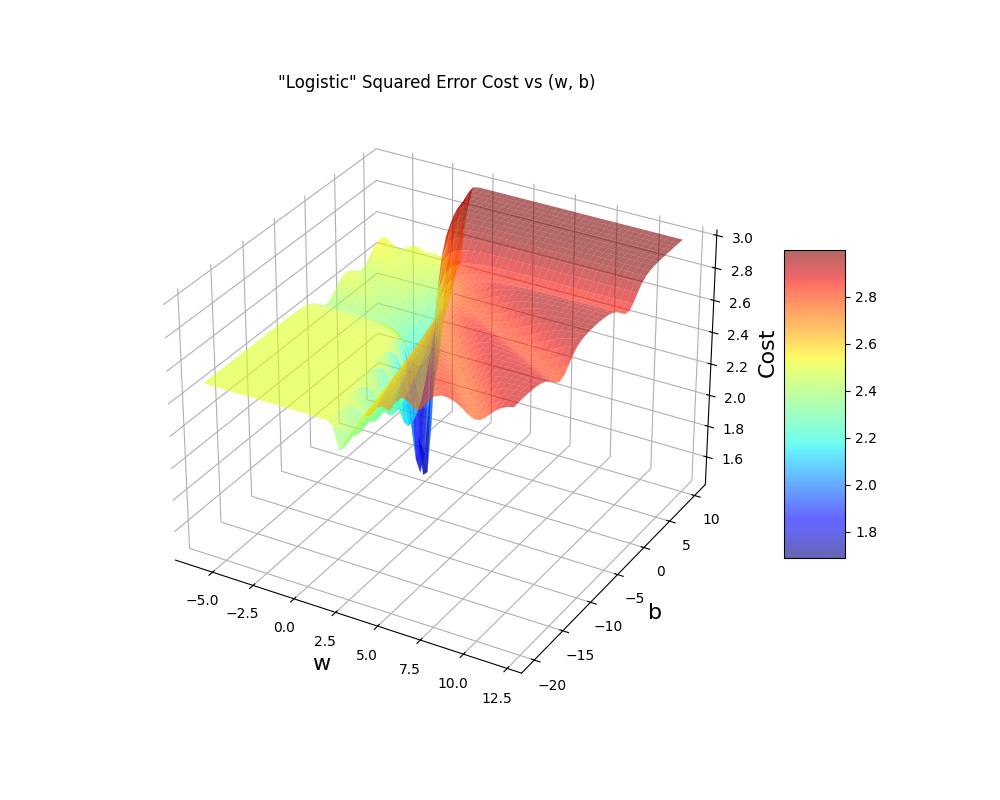

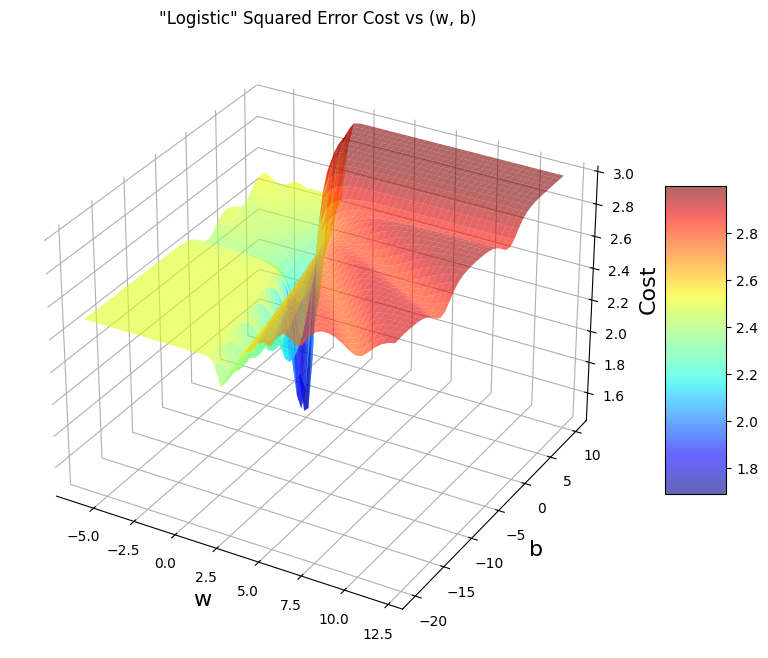

In [11]:
plt_logistic_squared_error(x_train, y_train)

Sebbene questo produca un grafico piuttosto interessante, la superficie sopra non è quasi così uniforme come quella della regressione lineare!    
La regressione logistica richiede una funzione di costo più adatta alla sua natura non lineare. Questo inizia con una funzione di perdita (Loss function).

La regressione logistica utilizza una funzione di perdita più adatta al compito di categorizzazione dove il target è 0 o 1 piuttosto che qualsiasi numero.
>**Nota sulla definizione:**:  
- **Loss (Perdita)** è una misura della differenza di un singolo esempio rispetto al suo valore target
- **Costo** è una misura delle perdite sull'intero set di addestramento

Questo è definito:
* $\mathcal{L}(y(x_n,w), t_n)$ è il costo per un singolo punto dati, che è:

$$\mathcal{L}(y(x_n,w), t_n) = 
\begin{cases} 
- \log(y(x_n,w)) & \text{se } t_n=1 \\
- \log(1 - y(x_n,w)) & \text{se } t_n=0
\end{cases}$$

*  $y(x_n,w)$ è la previsione del modello, mentre $t_n$ è il valore target.
*  $y(x_n,w) = g(w_1 x_n + w_0)$ dove la funzione $g$ è la funzione sigmoid.

La caratteristica distintiva di questa funzione di perdita è il fatto che utilizza due curve separate. Una per il caso in cui il target è zero o ($t=0$) e un'altra per quando il target è uno ($t=1$). Combinate, queste curve forniscono il comportamento utile per una funzione di perdita, vale a dire, essere zero quando la previsione corrisponde al target e aumentare rapidamente di valore quando la previsione differisce dal target. Considera le curve qui sotto:

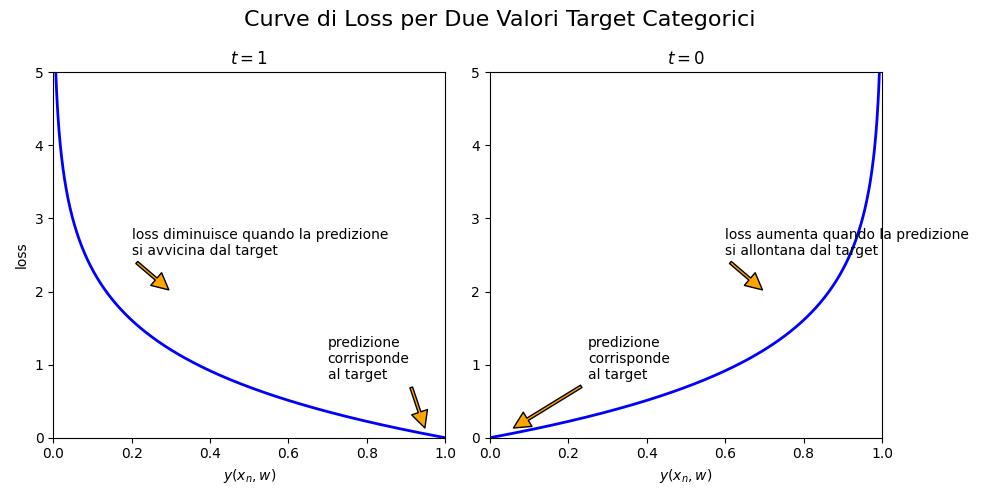

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from functions.utils import plot_two_logistic_loss_curves
plot_two_logistic_loss_curves()

Combinando le curve, sono simili alla curva quadratica della perdita dell'errore quadratico.

Nota, l'asse x è $y(x_n,w)$ che è l'output di una sigmoide. L'output della sigmoide è strettamente compreso tra 0 e 1.

La funzione di perdita sopra può essere riscritta per essere più facile da implementare.
    $$\mathcal{L}(y(x_n,w), t_n) = (-t_n \log\left(y\left(x_n,w \right) \right) - \left( 1 - t_n\right) \log \left( 1 - y\left(x_n,w \right) \right)$$
  
Questa è un'equazione è meno scoraggiante quando si considera che $t_n$ può avere solo due valori, 0 e 1. Si può quindi considerare l'equazione in due parti:  
quando $t_n = 0$, il termine a sinistra viene eliminato:
$$
\begin{align}
\mathcal{L}(y(x_n,w), 0) &= (-(0) \log\left(y\left(x_n,w \right) \right) - \left( 1 - 0\right) \log \left( 1 - y\left(x_n,w \right) \right) \\
&= -\log \left( 1 - y\left(x_n,w \right) \right)
\end{align}
$$
e quando $t_n = 1$, il termine a destra viene eliminato:
$$
\begin{align}
  \mathcal{L}(y(x_n,w), 1) &=  (-(1) \log\left(y\left(x_n,w \right) \right) - \left( 1 - 1\right) \log \left( 1 - y\left(x_n,w \right) \right)\\
  &=  -\log\left(y\left(x_n,w \right) \right)
\end{align}
$$
Con questa nuova funzione di perdita logistica, si può produrre una funzione di costo che incorpora la perdita di tutti gli esempi.

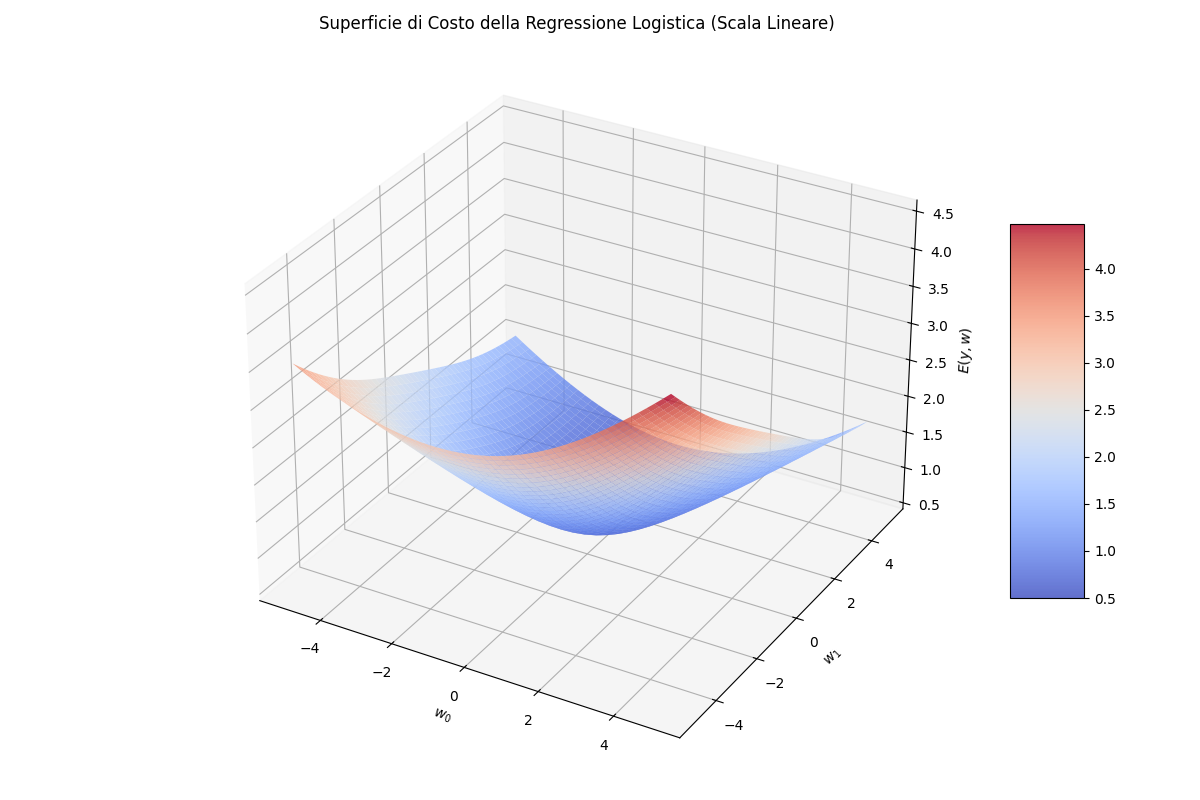

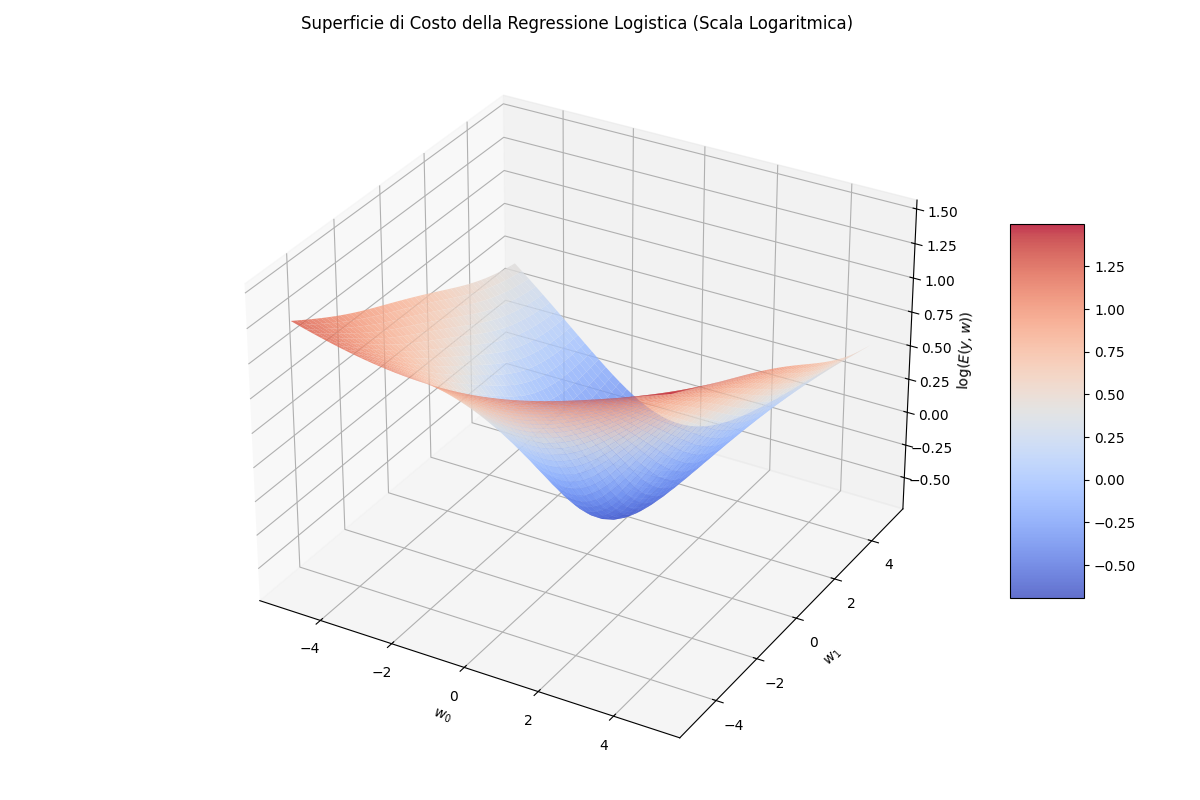

In [13]:
from functions.utils import plot_logistic_cost_surface_3d
# Visualizzazione in scala lineare
plot_logistic_cost_surface_3d('linear')
# Visualizzazione in scala logaritmica
plot_logistic_cost_surface_3d('log')